In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd

# 关注区域的基本地图的绘制
2021.12.21

remains 还在修改

将此前的border shapefiles部分写作函数，方便其他位置的代码调用此处的绘图函数

## 绘图部分

In [2]:
# 国内政区图的绘制
# Load the border data, CN-border-La.dat is download from
# https://gmt-china.org/data/CN-border-La.dat
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.patches as mpatches
import cmaps
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

In [3]:
%load_ext autoreload
%autoreload 2
def border_plot_singleax(ax):
        """
        进行行政区划的绘制，通过shapefilereader绘制存档的shp文件，需要传入axs，并逐个绘制
        比较消耗时间，调整完毕后最后添加边界的绘制
        """
        #----- 添加海洋以及行政区划 -----
        ##---- 直接绘图，从边界文件添加
        turn_on_border = True
        if(turn_on_border):
            ##---- 使用shp文件添加
                ## shapefile数据下载的位置：
            coast_shapefile = "/home/yycheng/playground/shapefiles/gshhg-shp/GSHHS_shp/l/GSHHS_l_L1.shp"
            ninelines_shapefile     = "/home/yycheng/playground/shapefiles/SouthSea/" + "nine_lines.shp"
            ## 来源： 沛沛的诸省 + 诸岛
            #     bou24p_shapefile     = "/m2data2/yycheng/data_stage/CN-border/peipeihelp/" + "bou2_4p.shp"
            ## 来源： https://www.resdc.cn/data.aspx?DATAID=200
            province_shapefile     = "/home/yycheng/playground/shapefiles/CN-sheng/" + "change_proj_CN-sheng-A.shp"
            # 环资所 世界国家
            world_country_shapefile = "/home/yycheng/playground/shapefiles/世界国家/世界国家.shp"
            for ax in axs:
                coast = shpreader.Reader(coast_shapefile).geometries()
                world     = shpreader.Reader(world_country_shapefile).geometries()
                # river     = shpreader.Reader(river_border_shapefile).geometries()
                #  river     = shpreader.Reader(river_border_shapefile, encoding = 'gbk')
                # bou24p    = shpreader.Reader(bou24p_shapefile).geometries()
                ninelines = shpreader.Reader(ninelines_shapefile).geometries()
                province  = shpreader.Reader(province_shapefile).geometries()
                ax.add_geometries(coast, ccrs.PlateCarree(), facecolor="none", edgecolor = 'k', linewidth=0.4, zorder=1 )
                ax.add_geometries(world, ccrs.PlateCarree(), facecolor='none', edgecolor='k', linewidth=0.4, zorder=1)
                # ax.add_geometries(bou24p, ccrs.PlateCarree(), facecolor='none', edgecolor='k', linewidth=0.6, zorder=1) # 沛沛map
                ax.add_geometries(province, ccrs.PlateCarree(), facecolor='none', edgecolor='k', linewidth=0.7, zorder=1) # 地资所
                ax.add_geometries(ninelines, ccrs.PlateCarree(), facecolor='none', edgecolor='k', linewidth=0.7, zorder=1)
                # ax.add_geometries(river, ccrs.PlateCarree(), facecolor='none', edgecolor='b', linewidth=0.4, zorder=1)
                # 绘制部分的shapefile
        #         for region in river.records():
        #             if (region.attributes['NAME'] in ['黄河','长江']):
        #                 # print("----- draw river! -----")
        #                 # 此处需要使用 [] 让region.geometry可以迭代
        #                 ax.add_geometries([region.geometry], ccrs.PlateCarree(), facecolor='none', edgecolor='b', linewidth=0.6, zorder=1)
        


CPU times: user 3min 38s, sys: 1.87 s, total: 3min 40s
Wall time: 3min 41s


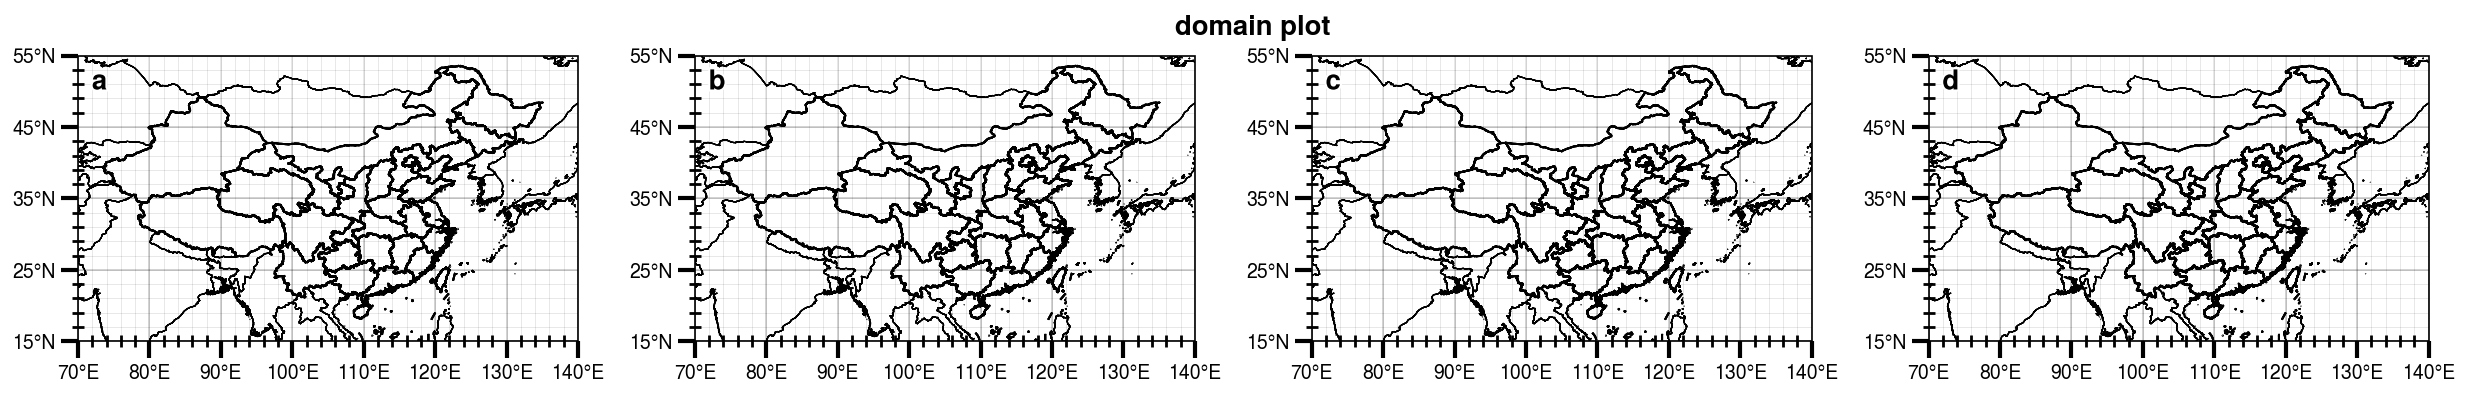

In [13]:
%%time
# import proplot as plot
from matplotlib import pyplot as plt
import proplot as plot
import cmaps
#----- create plot -----
# shape_array = [[1,2,3,4,],[5,6,7,0],[8,9,10,11],[12,13,14, 0]]
shape_array = [1,2,3,4]
fig, axs = plot.subplots(shape_array, proj=('cyl'))
m_contour_list = [] # 用于保存contour设置，后续设置colorbar使用

# # 绘制borders
for ax in axs:
    border_plot_singleax(ax)

# ---------format作为整个proplot集中对属性进行修改的method---------
axs.format(
abc=True,
abcloc = 'ul',
#----- 地图底图设置 -----
# reso = 'x-hi',
reso = 'med',
# coast = False,
coast = False,
coastlinewidth = 0.4,
borders = False,
lakes = False,
land  = False,
ocean = False,
#-----GEO axis-----
lonlim=(70, 140), latlim=(15, 55),
labels = False, # 后续自己手动添加带线条的
gridlabelsize = 5,
gridminor = True,
lonlocator = np.arange(70,150,10),
latlocator = np.arange(15,55,10),
lonminorlocator = np.arange(70,140+2,2),
latminorlocator = np.arange(15,55+2,2),
longrid  = True,
latgrid  = True,
suptitle="domain plot",
)

for ax_ind in axs:
    ax_ind.set_xticks( plot.arange(70,140,10) ,crs=ccrs.PlateCarree()) # set longitude indicators
    ax_ind.set_yticks( plot.arange(15,55,10) , crs=ccrs.PlateCarree())
    lon_formatter = LongitudeFormatter(zero_direction_label=True,number_format='.0f')#,degree_symbol='')
    lat_formatter = LatitudeFormatter(number_format='.0f')#,degree_symbol='')
    ax_ind.xaxis.set_major_formatter(lon_formatter)
    ax_ind.yaxis.set_major_formatter(lat_formatter)
    
    ax_ind.tick_params(which='minor',direction='inout',length=4,width=1., top = False, right = False, labelsize = 7.)
    ax_ind.tick_params(which='major',direction='out', length=6, width=1.5 , colors='k', top = False, right = False, labelsize = 7.)
    

#----- save figure -----
fig.patch.set_facecolor('white')
# fig.savefig('./output_pic/pre_interannualTCCs_91-15_12.21.png', dpi=600, facecolor= "white")